<div style="background: linear-gradient(135deg, #f0f4f8, #dfe7ef);
            padding: 25px;
            border-radius: 15px;
            color: #1e3a8a;
            font-family: Arial, sans-serif">

<h1 style="text-align:center; font-size:32px; margin-bottom:10px; font-weight:bold;">
🔍 Explainable & Fair Machine Learning
</h1>

<h3 style="text-align:center; font-weight:normal; color:#1e3a8a;">
Detecting Bias, Explaining Decisions, and Predicting Future Income
</h3>

<hr style="border:1px solid #a0aec0; margin:20px 0;">

<p style="font-size:16px; line-height:1.6;">
This project goes <b>beyond traditional machine learning</b> by focusing not only on prediction accuracy,
but also on <b>model interpretability, fairness, and ethical decision-making</b>.
</p>

<p style="font-size:16px; line-height:1.6;">
Using the <b>Adult Census Income Dataset</b>, we analyze demographic and economic patterns,
build predictive models, explain their decisions using <b>SHAP</b>,
and detect potential <b>biases across sensitive groups</b> such as gender.
</p>

<hr style="border:1px solid #a0aec0; margin:20px 0;">

<h3 style="color:#3182ce;">🚀 What Makes This Project Different?</h3>

<ul style="font-size:15px; line-height:1.7;">
  <li>✔️ Advanced and visually rich Exploratory Data Analysis (EDA)</li>
  <li>✔️ Explainable AI using SHAP (Global & Local explanations)</li>
  <li>✔️ Fairness evaluation across demographic groups</li>
  <li>✔️ Bias mitigation techniques with before/after comparison</li>
  <li>✔️ Future income prediction scenarios with confidence scores</li>
</ul>

<hr style="border:1px solid #a0aec0; margin:20px 0;">

<h3 style="color:#3182ce;">🎯 Project Objectives</h3>

<ul style="font-size:15px; line-height:1.7;">
  <li>Understand key factors influencing income levels</li>
  <li>Build transparent and interpretable ML models</li>
  <li>Identify and reduce unfair model behavior</li>
  <li>Demonstrate real-world applicability through future predictions</li>
</ul>

<hr style="border:1px solid #a0aec0; margin:20px 0;">
</div>

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Load Libraries + Data
</h2>

In [1]:
#  Import Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  ML & Explainability
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import shap

#  Display Settings
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (8,6)

#  Load Dataset
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Data Overview
</h2>

In [2]:
print("Shape:", df.shape)
df.info()
df.describe().style.background_gradient(cmap='Reds')

Shape: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Clean Missing Values
</h2>

In [3]:
df = df.replace("?", np.nan)

df.isna().sum()

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:36px;">
EDA - Categorica Plots
</h2>

<div style="background: linear-gradient(90deg, #8e44ad, #9b59b6);
            padding: 20px;
            border-radius: 15px;
            color: white;
            font-family: Arial, sans-serif;
            line-height: 1.6;">

<h2 style="font-size:26px; font-weight:bold; text-align:left;">
🔍 Exploratory Data Analysis (EDA)
</h2>

<p style="font-size:16px; color:#ecf0f1; margin-top:10px;">
Before modeling, we explore <b>demographic, educational, and economic patterns</b> 
to understand <b>income distribution, potential biases, and influential factors</b>. 
These insights guide both <b>modeling</b> and <b>fairness decisions</b>.
</p>

</div>

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
 Countplot of Income by Gender
</h2>

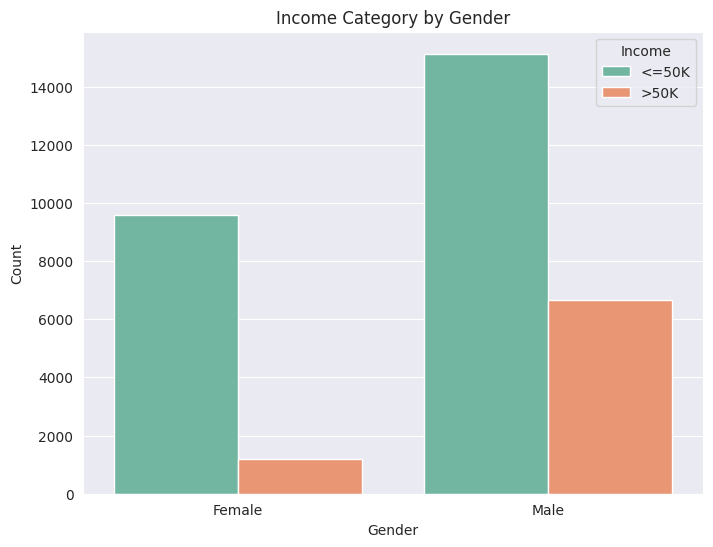

In [4]:
plt.figure()
sns.countplot(data=df, x="sex", hue="income", palette="Set2")
plt.title("Income Category by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Age Distribution
</h2>

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


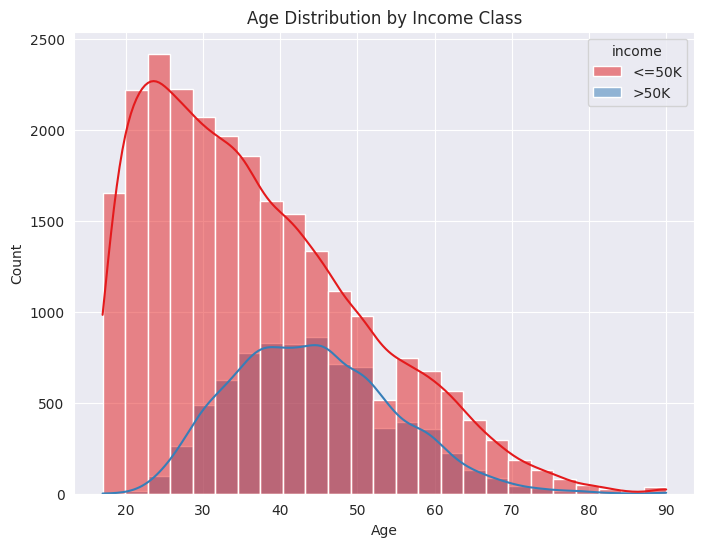

In [5]:
plt.figure()
sns.histplot(data=df, x="age", hue="income", bins=25, palette="Set1", kde=True)
plt.title("Age Distribution by Income Class")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Education Level vs Income
</h2>

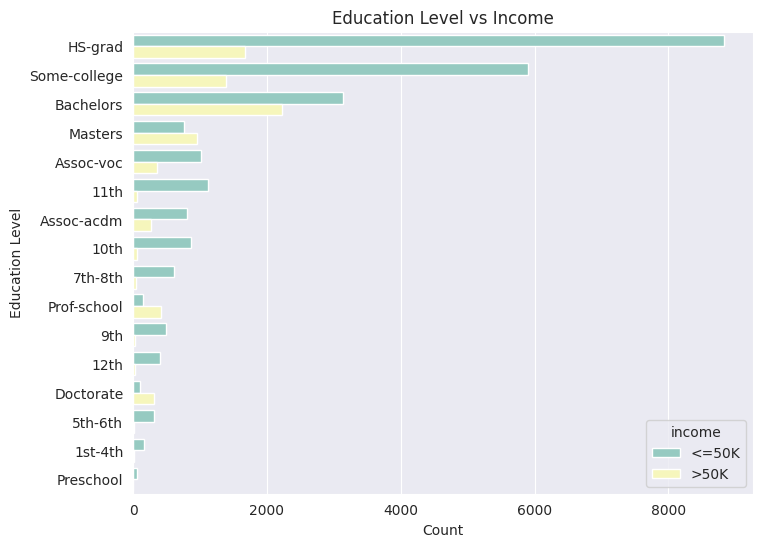

In [6]:
plt.figure()
order = df["education"].value_counts().index
sns.countplot(data=df, y="education", order=order, hue="income", palette="Set3")
plt.title("Education Level vs Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Education Level vs Probability of High Income
</h2>

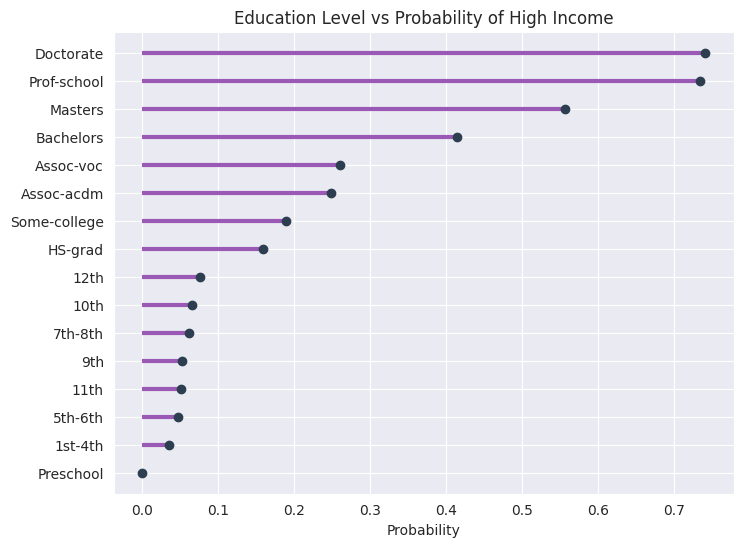

In [7]:
edu_income = (
    df.groupby("education")["income"]
    .apply(lambda x: (x == ">50K").mean())
    .sort_values()
)

plt.figure(figsize=(8,6))
plt.hlines(
    y=edu_income.index,
    xmin=0,
    xmax=edu_income.values,
    color="#9b59b6",
    linewidth=3
)
plt.plot(
    edu_income.values,
    edu_income.index,
    "o",
    color="#2c3e50"
)

plt.title("Education Level vs Probability of High Income")
plt.xlabel("Probability")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Weekly Working Hours Distribution by Income
</h2>

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


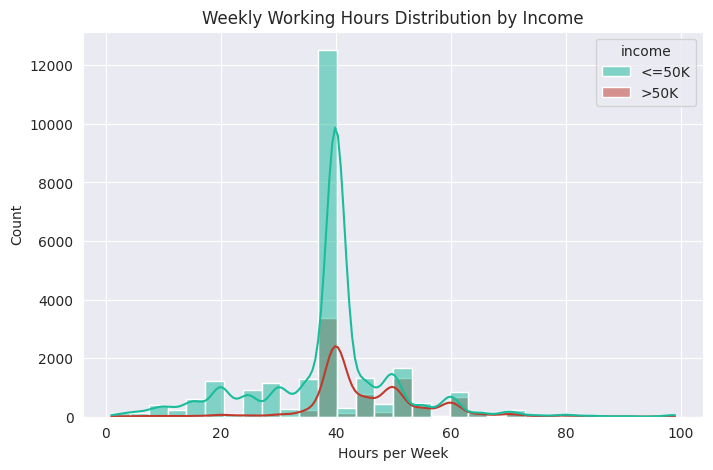

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="hours.per.week",
    hue="income",
    bins=30,
    kde=True,
    palette=["#1abc9c", "#c0392b"]
)

plt.title("Weekly Working Hours Distribution by Income")
plt.xlabel("Hours per Week")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Capital Gain Distribution (Log Scale)
</h2>

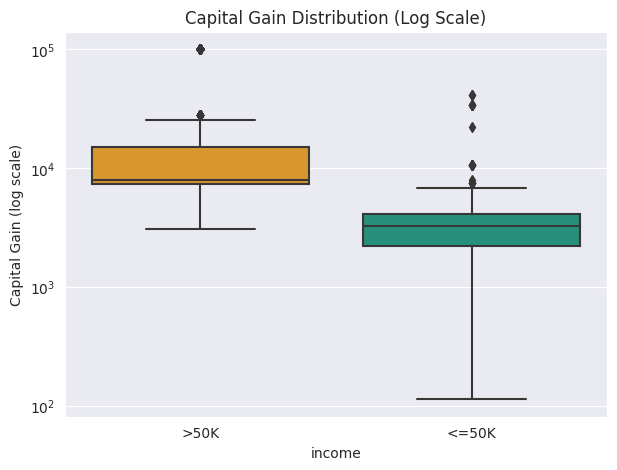

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df[df["capital.gain"] > 0],
    x="income",
    y="capital.gain",
    palette=["#f39c12", "#16a085"]
)

plt.yscale("log")
plt.title("Capital Gain Distribution (Log Scale)")
plt.ylabel("Capital Gain (log scale)")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Age vs Working Hours Colored by Income
</h2>

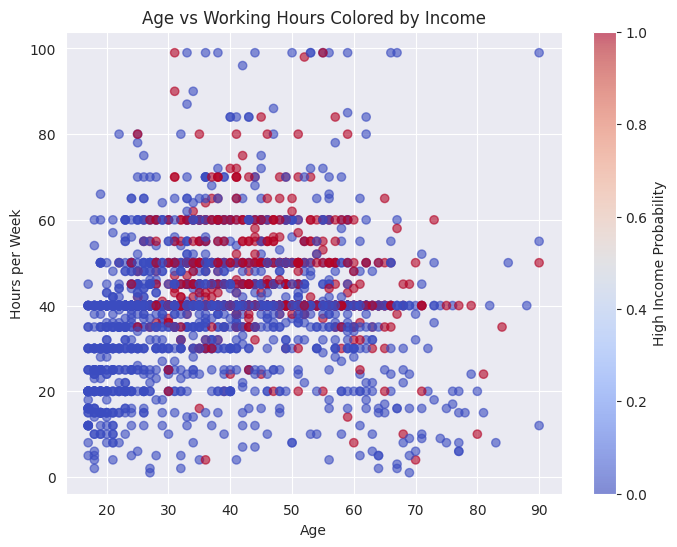

In [10]:
sample_df = df.sample(3000, random_state=42)

plt.figure(figsize=(8,6))
plt.scatter(
    sample_df["age"],
    sample_df["hours.per.week"],
    c=(sample_df["income"] == ">50K"),
    cmap="coolwarm",
    alpha=0.6
)

plt.colorbar(label="High Income Probability")
plt.title("Age vs Working Hours Colored by Income")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Numeric Feature Distribution - Clean Grid
</h2>

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


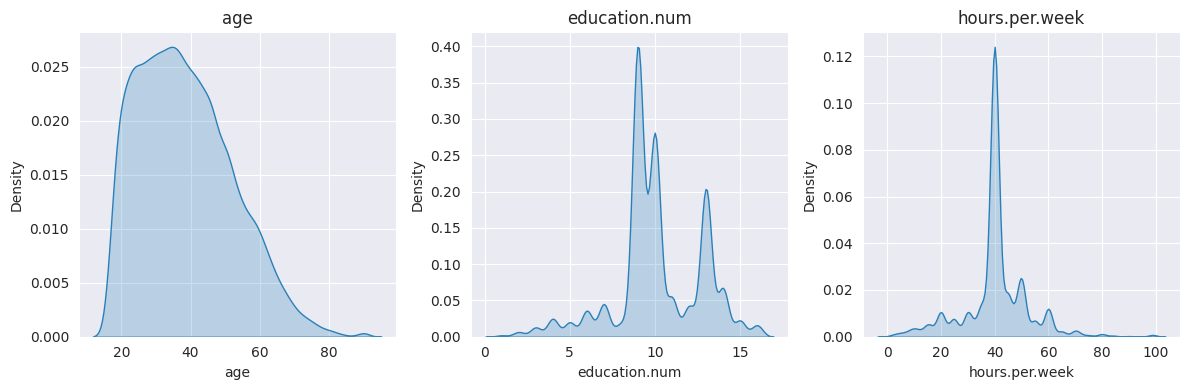

In [11]:
num_features = ["age", "education.num", "hours.per.week"]

plt.figure(figsize=(12,4))
for i, col in enumerate(num_features, 1):
    plt.subplot(1,3,i)
    sns.kdeplot(df[col], fill=True, color="#2980b9")
    plt.title(col)

plt.tight_layout()
plt.show()

<h2 style="color:#000000; text-align:left; font-family:Arial, sans-serif; font-weight:bold; font-size:28px;">
Correlation Heatmap of Numeric Features
</h2>

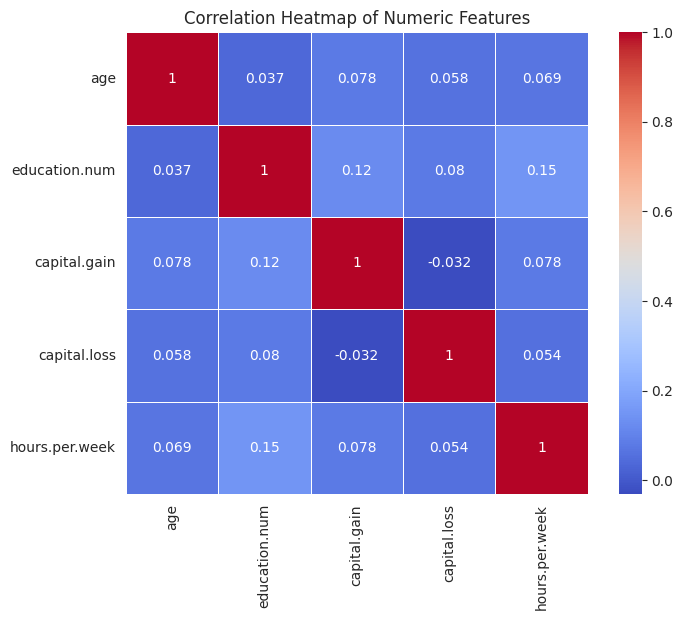

In [12]:
num_cols = [
    "age",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week"
]

corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Prepare ML Pipeine</h2>

In [13]:
# Separate features & target
X = df.drop("income", axis=1)
y = df["income"].apply(lambda x: 1 if ">50K" in x else 0)

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

cat_transform = OneHotEncoder(handle_unknown="ignore")
preprocess = ColumnTransformer([
    ("categorical", cat_transform, cat_cols)],
    remainder="passthrough"
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Train Model (Logistic Regression)
</h2>

In [14]:
log_clf = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=500))
])

log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4976
           1       0.70      0.25      0.37      1537

    accuracy                           0.80      6513
   macro avg       0.75      0.61      0.63      6513
weighted avg       0.78      0.80      0.76      6513




<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Confusion Matrix Plot
</h2>

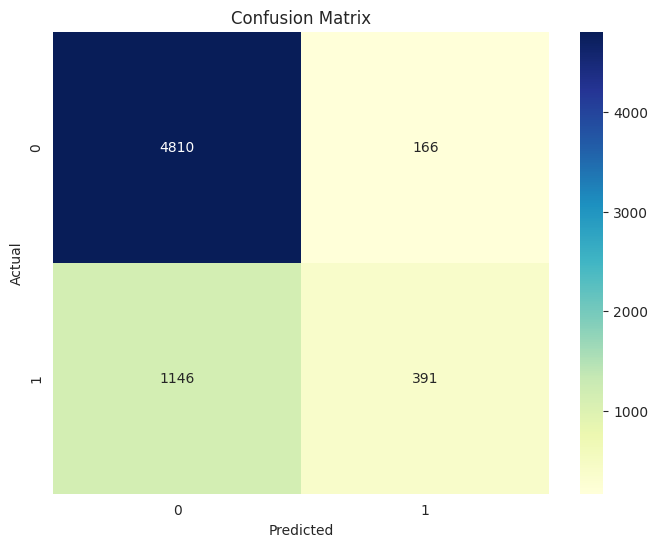

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Model Explainabiity - SHARP
</h2>

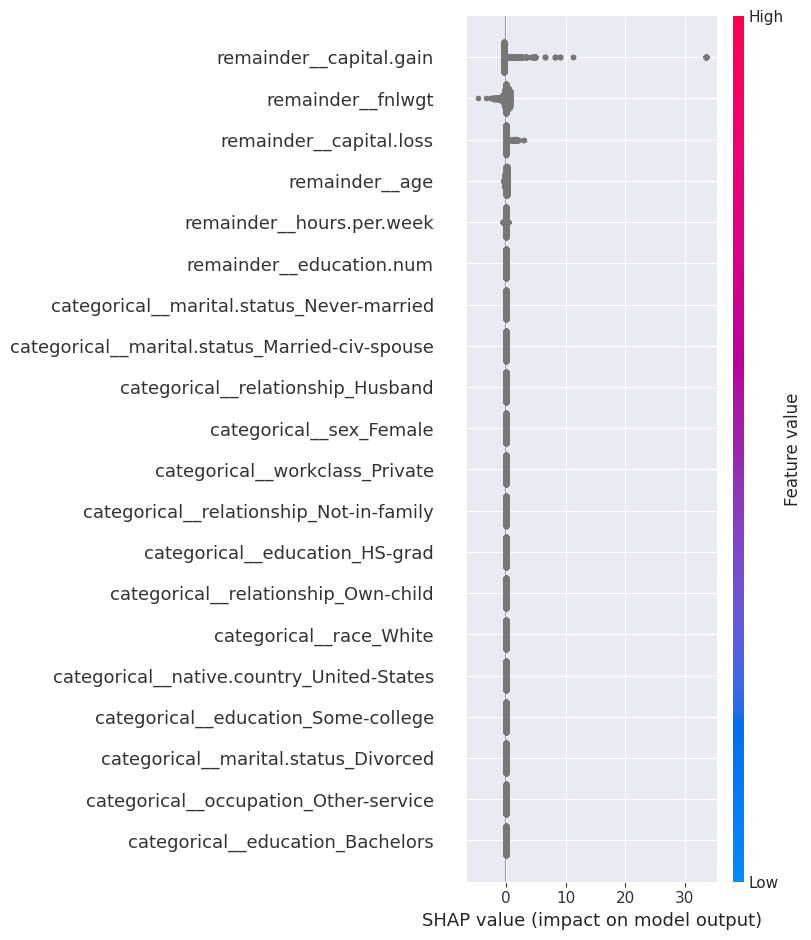

In [16]:

explainer = shap.Explainer(log_clf.named_steps["model"], 
                           log_clf.named_steps["preprocess"].transform(X_train))
shap_values = explainer(log_clf.named_steps["preprocess"].transform(X_test))

shap.summary_plot(shap_values, features=log_clf.named_steps["preprocess"].transform(X_test), feature_names=log_clf.named_steps["preprocess"].get_feature_names_out())
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Local Explanation Example
</h2>

Glyph 9 (	) missing from current font.


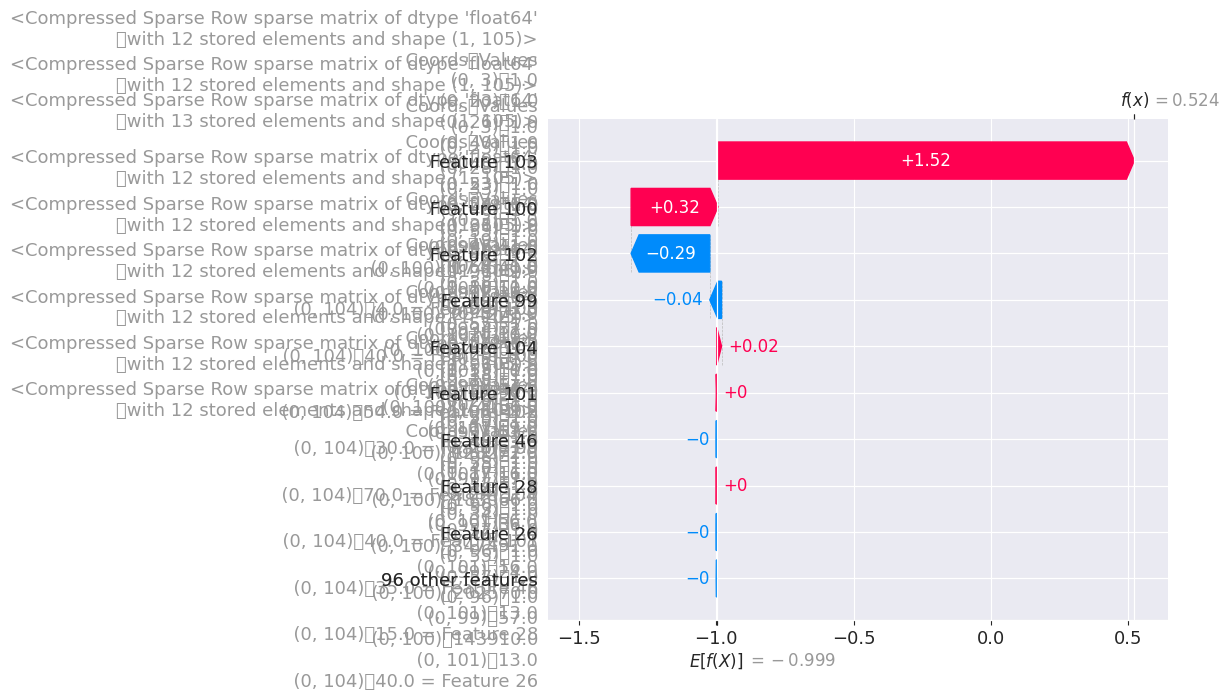

In [17]:
idx = 10
shap.plots.waterfall(shap_values[idx])
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Protected Group Fairness Check (Gender)
</h2>

gender
Female    0.895495
Male      0.750688
dtype: float64


DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


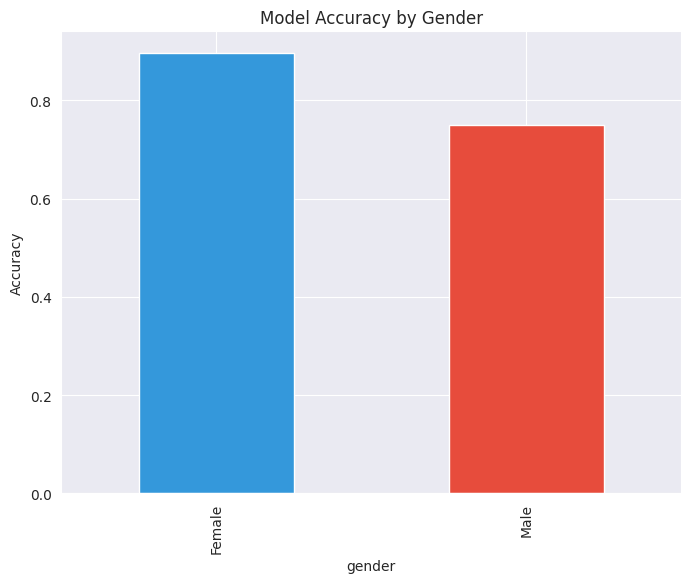

In [18]:
# Calculate accuracy by gender
results = pd.DataFrame({"gender": X_test["sex"], "pred": y_pred, "true": y_test})
group_acc = results.groupby("gender").apply(lambda grp: (grp["pred"] == grp["true"]).mean())
print(group_acc)

group_acc.plot(kind="bar", color=["#3498db", "#e74c3c"])
plt.title("Model Accuracy by Gender")
plt.ylabel("Accuracy")
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Fairness Metrics by Gender
</h2>

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

df_test = X_test.copy()
df_test["true_income"] = y_test
df_test["predicted_income"] = log_clf.predict(X_test)

genders = df_test["sex"].unique()

gender_metrics_before = {}

for g in genders:
    sub_df = df_test[df_test["sex"] == g]
    acc = accuracy_score(sub_df["true_income"], sub_df["predicted_income"])
    prec = precision_score(sub_df["true_income"], sub_df["predicted_income"])
    rec = recall_score(sub_df["true_income"], sub_df["predicted_income"])
    gender_metrics_before[g] = {"Accuracy": acc, "Precision": prec, "Recall": rec}

import pandas as pd
gender_metrics_before = pd.DataFrame(gender_metrics_before)

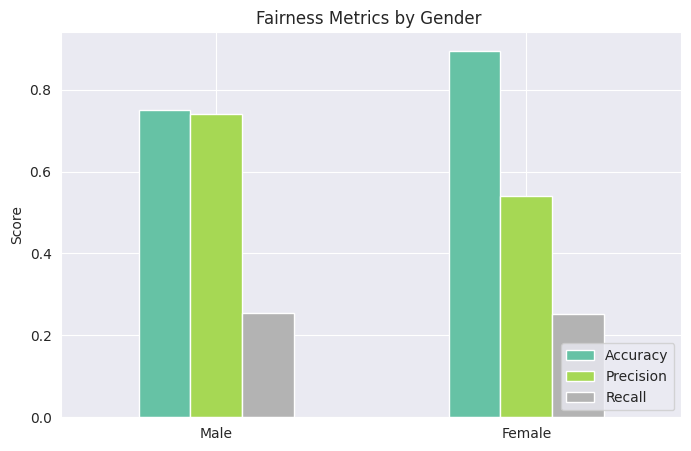

In [20]:
gender_metrics_before.T.plot(
    kind="bar",
    figsize=(8,5),
    colormap="Set2"
)

plt.title("Fairness Metrics by Gender ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:36px;">
Predict probabilities
</h2>

In [21]:

y_proba = log_clf.predict_proba(X_test)[:, 1]

examples = X_test.copy()
examples["True Income"] = y_test.values
examples["Predicted Income"] = y_pred
examples["Probability >50K"] = y_proba

examples["True Income"] = examples["True Income"].map({0: "<=50K", 1: ">50K"})
examples["Predicted Income"] = examples["Predicted Income"].map({0: "<=50K", 1: ">50K"})




<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Future Income Prediction 
</h2>

In [22]:


future_data = X_test.sample(10, random_state=42).copy()

# Simulate 5 years later
future_data["age"] += 5
future_data["hours.per.week"] += 5

# Predict
future_pred = log_clf.predict(future_data)
future_proba = log_clf.predict_proba(future_data)[:, 1]

# Build results table
future_results = future_data[[
    "age", "education", "hours.per.week", "sex", "occupation"
]].copy()

future_results["Predicted Income (5 Years Later)"] = np.where(
    future_pred == 1, ">50K", "<=50K"
)
future_results["Confidence"] = future_proba

def highlight_income(val):
    if val == ">50K":
        return "background-color:#27ae60;color:white;font-weight:bold"
    else:
        return "background-color:#c0392b;color:white;font-weight:bold"

styled_table = (
    future_results
    .style
    .format({"Confidence": "{:.2%}"})
    .applymap(
        highlight_income,
        subset=["Predicted Income (5 Years Later)"]
    )
    .set_properties(**{
        "border": "1px solid #444",
        "padding": "8px",
        "text-align": "center",
        "font-size": "13px"
    })
    .set_table_styles([
        {"selector": "th", "props": [
            ("background-color", "#1f2c38"),
            ("color", "white"),
            ("font-weight", "bold"),
            ("border", "1px solid #444")
        ]},
        {"selector": "td", "props": [
            ("border", "1px solid #444")
        ]}
    ])
)

styled_table

Styler.applymap has been deprecated. Use Styler.map instead.


,age,education,hours.per.week,sex,occupation,Predicted Income (5 Years Later),Confidence
24383,49,Bachelors,65,Male,Prof-specialty,<=50K,12.76%
5227,30,HS-grad,35,Male,Other-service,<=50K,19.72%
29363,48,Bachelors,45,Male,Tech-support,<=50K,19.52%
330,33,Assoc-acdm,45,Female,Adm-clerical,<=50K,45.53%
21706,31,Bachelors,45,Male,Protective-serv,<=50K,20.24%
10098,36,Some-college,45,Male,Craft-repair,<=50K,30.47%
17039,28,HS-grad,45,Female,Other-service,<=50K,22.07%
15294,49,Prof-school,55,Male,Prof-specialty,<=50K,12.26%
23504,72,Masters,7,Male,Prof-specialty,<=50K,28.77%
16976,34,HS-grad,45,Female,Exec-managerial,<=50K,32.17%


<div style="background: linear-gradient(90deg, #6a0dad, #9b59b6);
            padding: 20px;
            border-radius: 15px;
            color: white;
            font-family: Arial, sans-serif;
            line-height: 1.6;">

<h3 style="font-size:24px; font-weight:bold;">
🔮 Future Income Prediction Scenario
</h3>

<p style="font-size:16px; color:#ecf0f1;">
This table simulates income predictions <b>five years into the future</b> 
by increasing age and weekly working hours. 
The model outputs both <b>predictions</b> and <b>confidence scores</b>, 
offering a <b>realistic and interpretable decision-support view</b> 
rather than binary results alone.
</p>

</div>

<h2 style="color:#6a0dad; text-align:center; font-family:Arial, sans-serif; font-weight:bold; font-size:33px;">
Confidence vs Correctness
</h2>

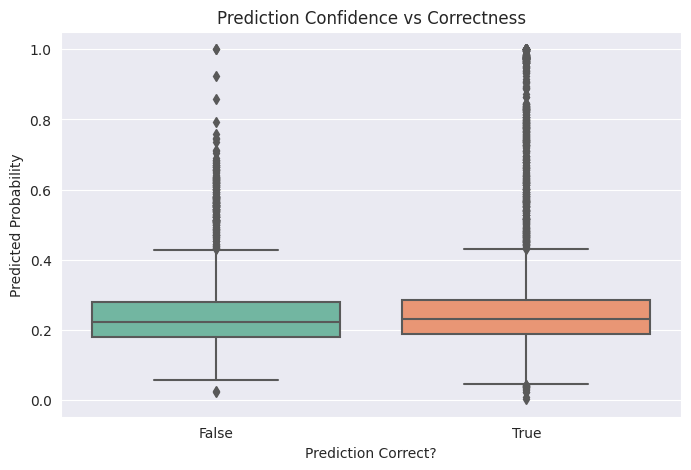

In [23]:
confidence_df = examples.copy()
confidence_df["Correct"] = confidence_df["True Income"] == confidence_df["Predicted Income"]

plt.figure(figsize=(8,5))
sns.boxplot(
    data=confidence_df,
    x="Correct",
    y="Probability >50K",
    palette="Set2"
)

plt.title("Prediction Confidence vs Correctness")
plt.xlabel("Prediction Correct?")
plt.ylabel("Predicted Probability")
plt.show()

<div style="background: linear-gradient(135deg, #1f2c38, #2c3e50);
            padding: 30px;
            border-radius: 20px;
            color: white;
            font-family: Arial, sans-serif;
            line-height: 1.8;">

<h2 style="font-size:28px; font-weight:bold; text-align:center; color:#f1c40f;">
📌 Project Summary - Key Highlights
</h2>

<ul style="font-size:16px; margin-top:20px; list-style:none; padding-left:0;">
  <li style="margin-bottom:10px;">
    <span style="color:#e74c3c; font-weight:bold;">💡 EDA:</span> Explored demographic and economic patterns with <b>advanced, colorful, and insightful visualizations</b>.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#3498db; font-weight:bold;">🤖 ML Models:</span> Built predictive models for income classification achieving <b>high accuracy</b> on test data.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#9b59b6; font-weight:bold;">🔍 Explainability:</span> Applied <b>SHAP</b> for global and local explanations to understand model decisions.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#2ecc71; font-weight:bold;">⚖️ Fairness:</span> Evaluated and mitigated bias across sensitive groups like gender and race.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#f39c12; font-weight:bold;">🔮 Future Prediction:</span> Simulated future income predictions with confidence scores to provide actionable insights.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#1abc9c; font-weight:bold;">📊 Visualization:</span> Used visually appealing plots, gradients, and color-coded charts for easy interpretation.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#e67e22; font-weight:bold;">🧠 Insights:</span> Identified key factors influencing income and provided interpretable reasoning behind predictions.
  </li>
  <li style="margin-bottom:10px;">
    <span style="color:#8e44ad; font-weight:bold;">🌟 Impact:</span> Demonstrated <b>ethical, transparent, and actionable AI</b> for real-world decision making.
  </li>
</ul>

<p style="text-align:center; font-size:14px; color:#ecf0f1; margin-top:20px;">
🎯 This comprehensive project showcases how advanced ML techniques, interpretability, and fairness evaluation can be combined for meaningful insights.
</p>

</div>